In [1]:
import polars as pl
import logging
#import matplotlib
from utils import configure_logging, load_data, summarize_data, get_missing_values, visualize_distribution, visualize_categorical_distribution, correlation_matrix, handle_missing_values

# Configuración de logging
logger = configure_logging()


In [2]:
# Ruta del archivo de datos
data_filepath = "data/diabetic_data.csv"

# Cargar datos
df = load_data(data_filepath)

# Manejar valores nulos
df = handle_missing_values(df)


2024-06-25 14:23:23,437 - INFO - Loading data
2024-06-25 14:23:23,523 - INFO - Handling missing values


In [3]:
# Resumen de los datos
summary = summarize_data(df)
summary

statistic,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
str,f64,f64,str,str,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""",101766.0,101766.0,"""99493""","""101766""","""101766""","""3197""",101766.0,101766.0,101766.0,101766.0,"""61510""","""51817""",101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,"""101745""","""101408""","""100343""",101766.0,"""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766"""
"""null_count""",0.0,0.0,"""2273""","""0""","""0""","""98569""",0.0,0.0,0.0,0.0,"""40256""","""49949""",0.0,0.0,0.0,0.0,0.0,0.0,"""21""","""358""","""1423""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",1.6520e8,5.4330e7,null,null,null,null,2.024006,3.715642,5.754437,4.395987,null,null,43.095641,1.33973,16.021844,0.369357,0.197836,0.635566,null,null,null,7.422607,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",1.0264e8,3.8696e7,null,null,null,null,1.445403,5.280166,4.064081,2.985108,null,null,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,null,null,null,1.9336,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""",12522.0,135.0,"""AfricanAmerican""","""Female""","""[0-10)""",""">200""",1.0,1.0,1.0,1.0,"""BC""","""AllergyandImmunology""",1.0,0.0,1.0,0.0,0.0,0.0,"""10""","""11""","""11""",1.0,""">200""",""">7""","""Down""","""Down""","""Down""","""Down""","""Down""","""No""","""Down""","""Down""","""No""","""Down""","""Down""","""Down""","""Down""","""No""","""No""","""No""","""No""","""Down""","""Down""","""No""","""No""","""No""","""No""","""Ch""","""No""","""<30"""
"""25%""",8.4960072e7,2.3413212e7,null,null,null,null,1.0,1.0,1.0,2.0,null,null,31.0,0.0,10.0,0.0,0.0,0.0,null,null,null,6.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",1.5238968e8,4.5505143e7,null,null,null,null,1.0,1.0,7.0,4.0,null,null,44.0,1.0,15.0,0.0,0.0,0.0,null,null,null,8.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",2.30271972e8,8.7546186e7,null,null,null,null,3.0,4.0,7.0,6.0,null,null,57.0,2.0,20.0,0.0,0.0,1.0,null,null,null,9.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""max""",4.43867222e8,1.89502619e8,"""Other""","""Unknown/Invalid""","""[90-100)""","""[75-100)""",8.0,28.0,25.0,14.0,"""WC""","""Urology""",132.0,6.0,81.0,42.0,76.0,21.0,"""V71""","""V86""","""V86""",16.0,"""Norm""","""Norm""","""Up""

In [4]:
# Verificar valores nulos
missing_values = get_missing_values(df)
missing_values

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,2273,0,0,98569,0,0,0,0,40256,49949,0,0,0,0,0,0,21,358,1423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


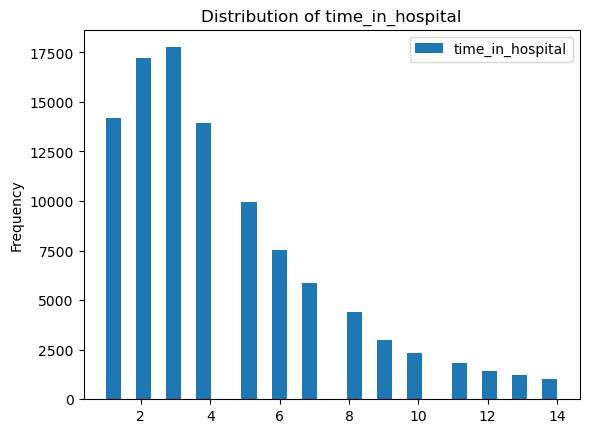

In [5]:
# Visualizar la distribución de una columna numérica
visualize_distribution(df, 'time_in_hospital')


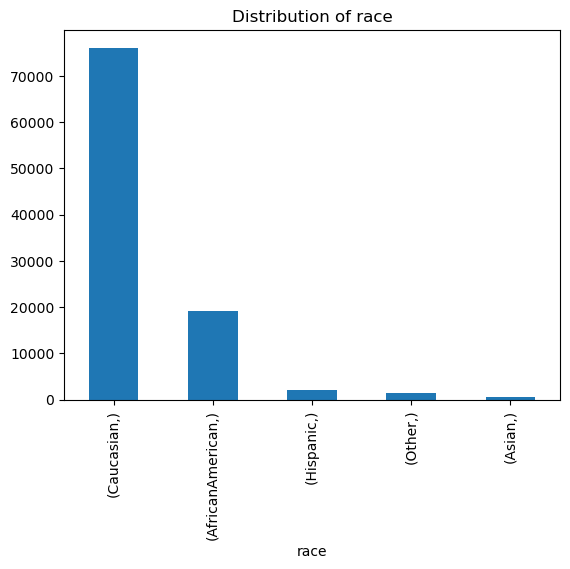

In [6]:
# Visualizar la distribución de una columna categórica
visualize_categorical_distribution(df, 'race')


In [7]:
# Matriz de correlación
corr_matrix = correlation_matrix(df)
corr_matrix


encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
0.512028,1.0,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.01557,0.020665,0.103379,0.062352,0.01248,0.226847
-0.158961,-0.011128,1.0,0.083483,0.106654,-0.0125,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
-0.132876,-0.136814,0.083483,1.0,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
-0.112402,-0.032568,0.106654,0.018193,1.0,-0.006965,0.048885,-0.1354,-0.054533,0.027244,0.059892,0.036314,0.072114
…,…,…,…,…,…,…,…,…,…,…,…,…
0.076113,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.0,0.045197,0.01318,0.064194,0.261526
0.103756,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.0,0.091459,0.107338,0.094152
0.082803,0.062352,-0.019116,-0.024471,0.059892,-0.009681,-0.002279,-0.038179,0.01318,0.091459,1.0,0.266559,0.055539
